### MNIST dataset - Convolutional Neural Network (CNN)

### Load MNIST as in file mnist_ffnn

In [44]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [87]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

#Check data dimensions

print("Train Images Shape: ", train_images.shape)
print("Train Labels Shape: ", train_labels.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Labels Shape: ", test_labels.shape)


Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


### Data pre-processing


In [89]:
from tensorflow.keras.utils import to_categorical

# Reshape images for CNN
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encoding of labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Check shapes after preprocessing
print("Train Images Shape:", train_images.shape)  # (60000, 28, 28, 1)
print("Test Images Shape:", test_images.shape)    # (10000, 28, 28, 1)
print("Train Labels Shape:", train_labels.shape)  # (60000, 10)
print("Test Labels Shape:", test_labels.shape)    # (10000, 10)

Train Images Shape: (60000, 28, 28, 1)
Test Images Shape: (10000, 28, 28, 1)
Train Labels Shape: (60000, 10)
Test Labels Shape: (10000, 10)


### Model structure (Convolutional Neural Network - CNN)

In [91]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# How many trainable parameters has CNN ? Compare with FFNN

model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### CNN training

In [93]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#train the model (fit)
history = model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels), batch_size=64)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.8731 - loss: 0.3959 - val_accuracy: 0.9806 - val_loss: 0.0625
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.9881 - val_loss: 0.0362


### Plot the trajectory of the training loss and accuracy over the training epochs

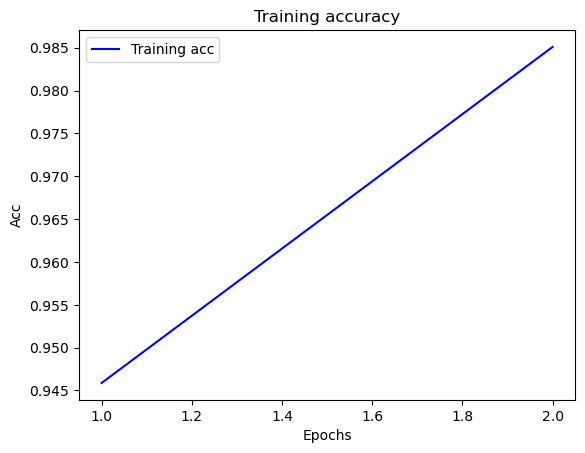

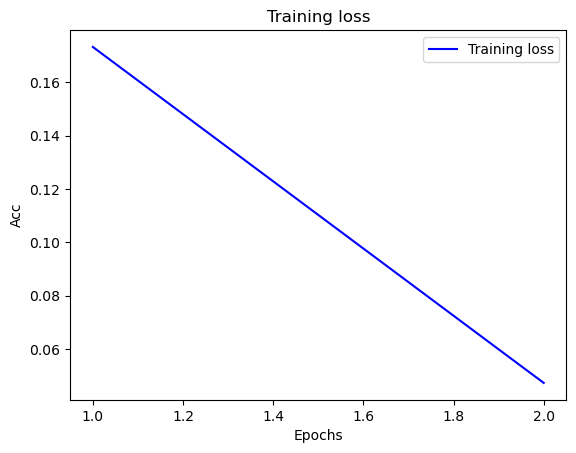

(Text(0.5, 24.0, 'Epochs'),
 Text(24.000000000000007, 0.5, 'Acc'),
 None)

In [95]:
#history_dict = history.history
acc_values = history.history['accuracy'] 
loss_values = history.history['loss'] 

epochs = range(1, len(acc_values) + 1)


plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs'), plt.ylabel('Acc'), plt.legend(),plt.show()


#Plot the training loss

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs'), plt.ylabel('Acc'), plt.legend(),plt.show()

### Evaluate CNN on train and test data, compare the final train and test accuracy, compare with FFNN results.

In [105]:
test_preds = model.predict(test_images)

print(test_preds.shape)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test loss: {}, Test accuracy: {}".format(test_loss, test_acc))
#Compare the test and train loss and accuracy 

train_loss, train_acc = model.evaluate(train_images, train_labels)

print("Training loss: {}, Training accuracy: {}".format(train_loss, train_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
(10000, 10)
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9835 - loss: 0.0461
Test loss: 0.03622330352663994, Test accuracy: 0.988099992275238
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9889 - loss: 0.0338
Training loss: 0.03398822247982025, Training accuracy: 0.9887333512306213
